In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Preprocessing_68/processed_after_impute.csv',sep=',', parse_dates=['datetime'],index_col='datetime')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Focus on Global_active_power column
col = 'Global_active_power'

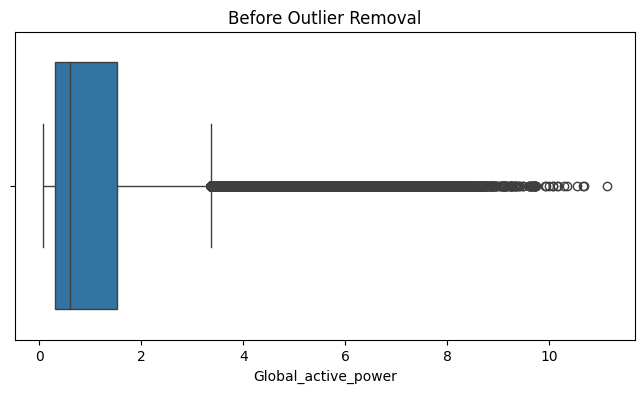

In [11]:
# 1. Boxplot before outlier removal
plt.figure(figsize=(8,4))
sns.boxplot(x=df[col])
plt.title("Before Outlier Removal")
plt.savefig('/content/drive/MyDrive/Preprocessing_68/eda_visualizations/boxplot_before_outliers.png',dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# 2. Detect outliers using IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [13]:
outliers = df[(df[col] < lower) | (df[col] > upper)]
print("Number of outliers detected:", outliers.shape[0])

Number of outliers detected: 94907


In [15]:
# 3. Handle outliers by capping (Winsorizing)
df_no_outliers = df.copy()
df_no_outliers[col] = df_no_outliers[col].clip(lower, upper)

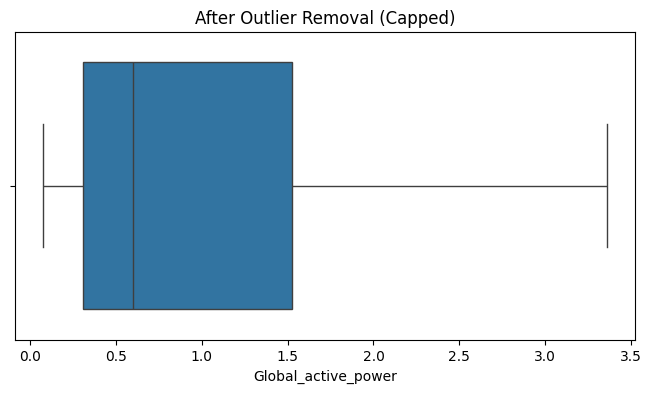

In [16]:
# 4. Boxplot after outlier removal
plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_outliers[col])
plt.title("After Outlier Removal (Capped)")
plt.savefig('/content/drive/MyDrive/Preprocessing_68/eda_visualizations/boxplot_after_outliers.png',dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# 5. Save processed dataset
output_file = '/content/drive/MyDrive/Preprocessing_68/processed_after_outliers.csv'
df_no_outliers.to_csv(output_file, index=True)
print("Saved cleaned dataset without outliers to:", output_file)

Saved cleaned dataset without outliers to: /content/drive/MyDrive/Preprocessing_68/processed_after_outliers.csv
